In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [50]:
titanic_data = pd.read_csv('TITANIC.csv')
titanic_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [51]:
titanic_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [4]:
titanic_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Leeni, Mr. Fahim (""Philip Zenni"")",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [52]:
titanic_data.shape

(891, 12)

In [53]:
titanic_data.nunique()

PassengerId    891
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
Survived         2
dtype: int64

In [54]:
titanic_data.isnull().values.any()

True

In [55]:
titanic_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

#### We found that there are 177 null values in 'Age' column , 687 null values in 'Cabin' column and 2 in 'Embarked' column

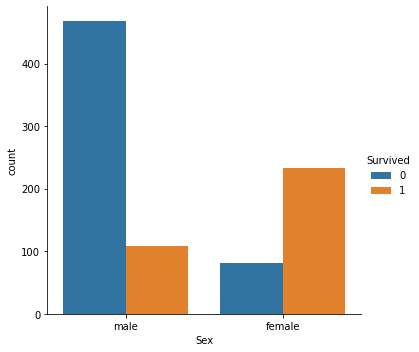

In [56]:
sns.catplot(x='Sex',hue='Survived',kind='count',data=titanic_data)

#### We found that there more number of male than female and also more female survived than male with respective of their total numbers when they all are boarded


In [57]:
group = titanic_data.groupby(['Pclass','Survived'])
pclass_survived = group.size().unstack()

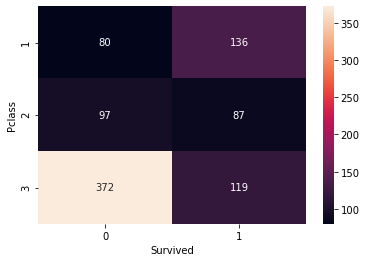

In [58]:
sns.heatmap(pclass_survived,annot=True,fmt='d')

### We found that passengers of Pclass1 survival rate is max, than Pclass3 than Pclass2
### We infered that passengers of Pclass3 non survival rate is max and than Pclass2 and than Pclass1

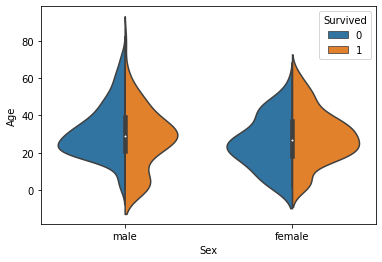

In [59]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=titanic_data,split=True)

### We found that there are more number of people of age around 20-40 which are mostly affected in survival and non-survival form

In [60]:
# Adding a column Family_Size
titanic_data['Family_Size']=0
titanic_data['Family_Size']=titanic_data['Parch']+titanic_data['SibSp']

In [61]:
#Adding a column alone
titanic_data['Alone']=0
titanic_data.loc[titanic_data.Family_Size==0,'Alone']=1

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


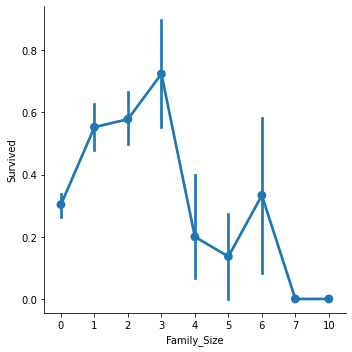

In [62]:
#Factorplot for Family_Size
sns.factorplot(x='Family_Size',y='Survived',data=titanic_data)

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


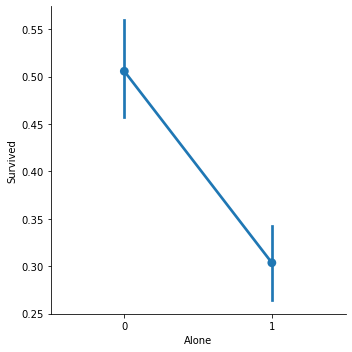

In [63]:
sns.factorplot(x='Alone',y='Survived',data=titanic_data)

In [64]:
# Divide Fare into 4 Bins
titanic_data['Fare_Range']=pd.qcut(titanic_data['Fare'],4)

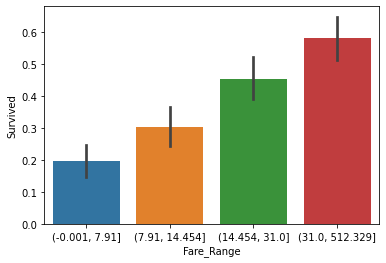

In [65]:
#Barplot
sns.barplot(x='Fare_Range',y='Survived',data=titanic_data)

### We found that passengers who paid higher fare have the high survival rate here

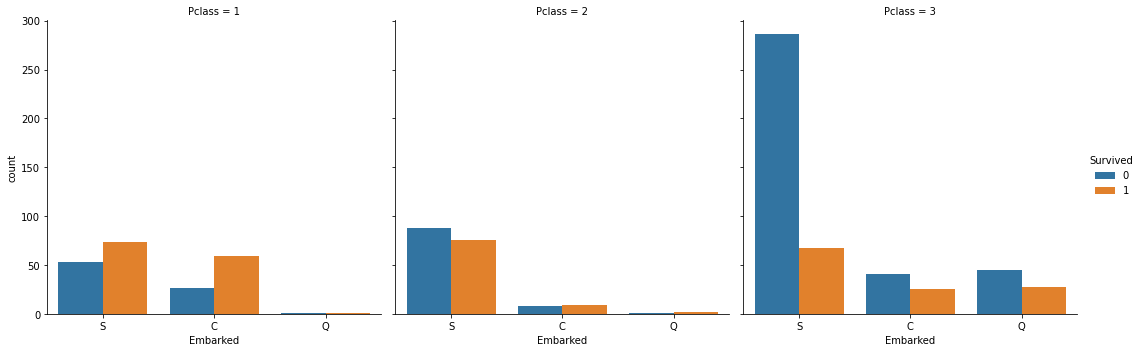

In [66]:
sns.catplot(x='Embarked',hue='Survived',kind='count',col='Pclass',data=titanic_data)

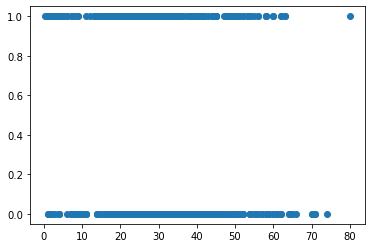

In [67]:
plt.scatter(titanic_data['Age'],titanic_data['Survived'])

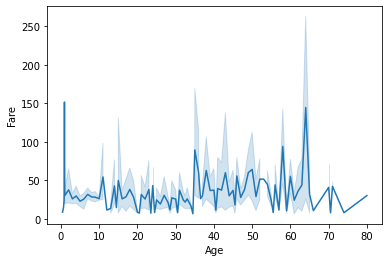

In [69]:
sns.lineplot(x='Age',y='Fare',data=titanic_data)

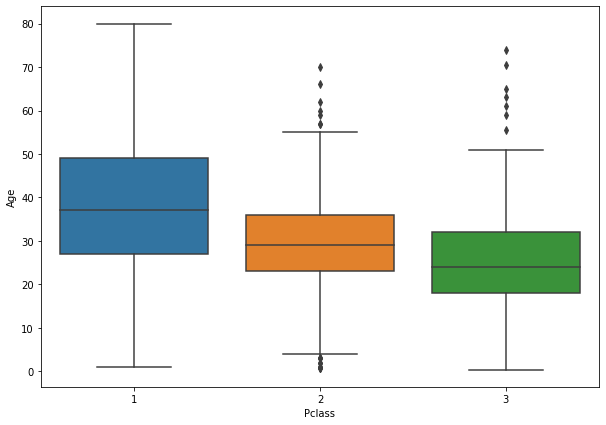

In [70]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic_data)

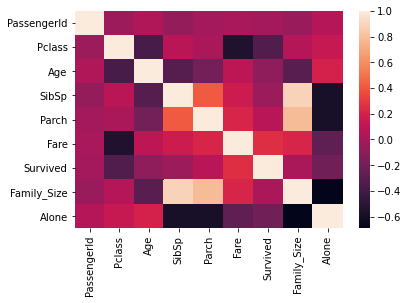

In [72]:
sns.heatmap(titanic_data.corr())

### The darker the shade the more is the relation between the x and y part of that block